# Water Quality Prediction

## Feature Engineering

In [133]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [134]:
import warnings
warnings.filterwarnings('ignore')

In [135]:
#reading the saved dataframe
data_frame=pd.read_csv('input_data_water_quality_prediction.csv')

In [136]:
data_frame.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [202]:
data_frame.shape

(3276, 10)

The dataframe has 3276 rows and 10 colunmns

In [138]:
#representing the null value count in dataframe
null_data=pd.DataFrame(data_frame.isnull().sum(),columns={'Null value count'})

In [139]:
null_data

,Null value count
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


## Handling null values

In [141]:
#defining a function to replace the null values with median of that feature
def impute_null_median(col_name):
    median=data_frame[cols].median()
    data_frame[cols].fillna(median,inplace=True)

In [142]:
null_cols=null_data[null_data['Null value count']>0].index
#extracting the index values which are feature names which have null value count more than 0
for cols in null_cols:
    impute_null_median(cols)

In [143]:
data_frame.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [144]:
#rechecking the null values
data_frame.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [145]:
#There are no longer the null values.

## Handling the outliers

In [146]:
#Function to replace the outliers with median value
def outlier_median(data_frame,col_name):
    #computing the median value
    median=data_frame[col_name].median()
    #initializing the threshold value
    threshold=3
    #getting mean value
    mean=data_frame[col_name].mean()
    #getting std value
    std=data_frame[col_name].std()
    outlier_values=[]
    #iterating through feature data
    for i in data_frame[col_name]:
        #calculating z_score
        z_score=(i-mean)/std
        #checking whether the z_score is greater than threshold value. 
        #If yes, will replace with median value and append to outlier_values list
        if z_score>threshold:
            outlier_values.append(i)
            data_frame[col_name].replace(i,median,inplace=True)
    if len(outlier_values)>0:
        print('Outlier values in {}:'.format(col_name))
        print(outlier_values)
        print('are replaced with median value: ',median)

Outlier values in ph:
[13.175401724233025, 11.89807802974039, 12.246928068519756, 11.53488049111763, 13.999999999999998, 11.568767965914164, 11.907739829669833, 13.54124023656798, 13.349888560662292, 11.563169064627823, 11.496702452694173, 11.496858885301972, 11.62114013448698, 11.491010908391427]
are replaced with median value:  7.036752103833548
-----------------------------------------------


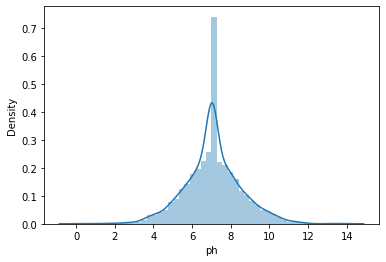

Outlier values in Hardness:
[304.23591211231667, 300.29247579584023, 307.70602408798766, 323.124, 311.38395647301763, 308.2538329449222, 306.6274814200808, 298.09867947877547, 317.33812405558257, 303.7026267264731]
are replaced with median value:  196.96762686363076
-----------------------------------------------


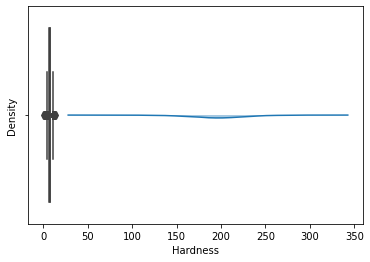

Outlier values in Solids:
[48621.56395153603, 52318.91729758968, 49074.73040737054, 52060.22680026684, 56867.85923615444, 55334.70279929284, 48410.471014066046, 56351.39630372492, 56488.67241273919, 49125.36008417044, 50279.262429338494, 49009.92465602681, 49341.42127856802, 61227.19600771213, 49456.5871084231, 50793.898916874045, 56320.586979158514, 53735.89919386698, 50166.53332259415, 51731.82055324112]
are replaced with median value:  20927.833606520187
-----------------------------------------------


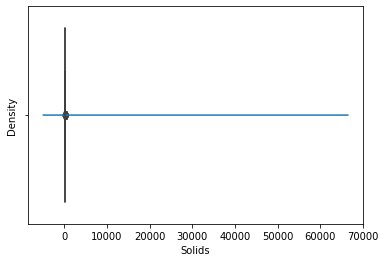

Outlier values in Chloramines:
[12.580026491367864, 13.043806107761023, 12.912186637308174, 12.36328482531005, 13.127000000000002, 12.062536203606816, 12.279374176513643, 12.626899738790904, 11.994290224518096, 12.24639409776954, 12.227175278872044, 11.930447965564245, 12.653362021943142, 11.996015117959512]
are replaced with median value:  7.130298973883081
-----------------------------------------------


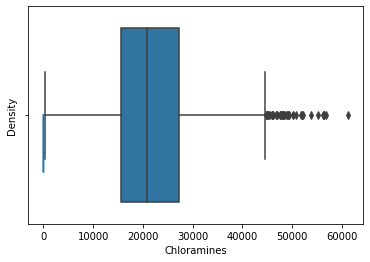

Outlier values in Sulfate:
[444.9705519713224, 445.9383911976929, 444.3757306927798, 455.4512337131526, 442.7614283690455, 475.7374601531338, 462.4742150404136, 476.5397173325516, 449.2676875055576, 460.1070689926536, 445.3595466581445, 458.441072258561, 447.41796235990216, 481.0306423059972, 450.9144544082035, 446.72401618621694]
are replaced with median value:  333.073545745888
-----------------------------------------------


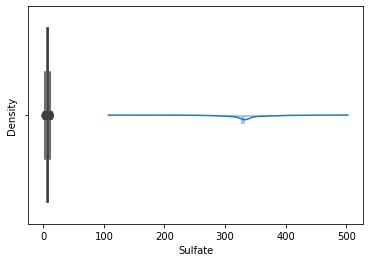

Outlier values in Conductivity:
[669.725086180179, 672.5569992377071, 695.3695279880473, 708.2263644667531, 753.3426195583046, 674.4434758802673]
are replaced with median value:  421.8849682800544
-----------------------------------------------


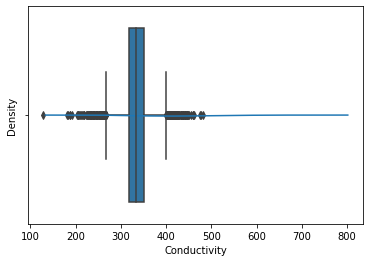

Outlier values in Organic_carbon:
[28.30000000000001, 24.75539236988334, 27.00670661116601]
are replaced with median value:  14.218337937208588
-----------------------------------------------


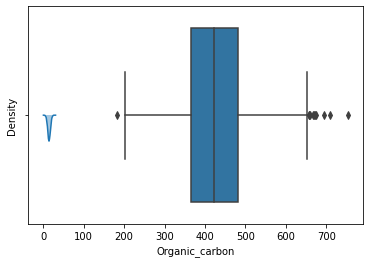

Outlier values in Trihalomethanes:
[120.03007700530677, 116.16162156199742, 118.3572747362022, 114.20867137787718, 124.0, 114.03494570231868]
are replaced with median value:  66.62248509808484
-----------------------------------------------


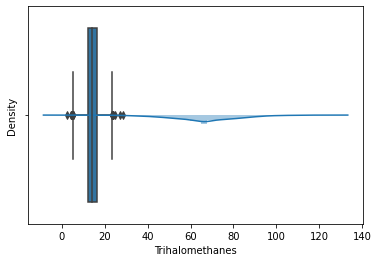

Outlier values in Turbidity:
[6.494249467472996, 6.739, 6.357438520067428, 6.389161009216368, 6.494748555990993]
are replaced with median value:  3.955027562993039
-----------------------------------------------


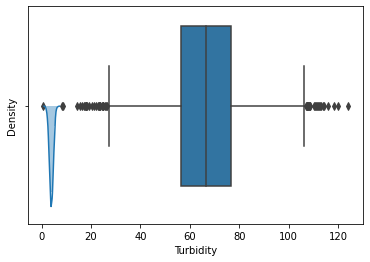

-----------------------------------------------


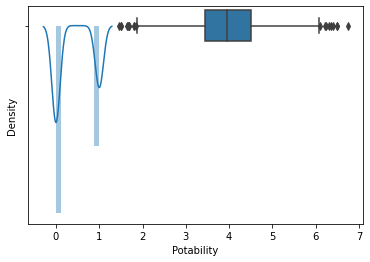

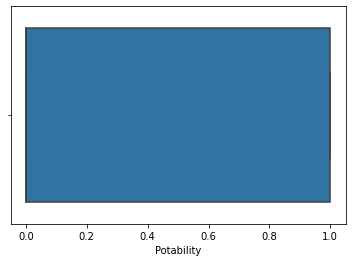

In [147]:
data=data_frame.copy()
for cols in data.columns:
    outlier_median(data,cols)
    print('-----------------------------------------------')
    sns.distplot(data_frame[cols])
    plt.show()
    sns.boxplot(data_frame[cols])

**The values which are transformed using z_score aren't resolving outlier issue.**

In [157]:
## Replacing the outliers using IQR values
def value_range(datacolumn):
    sorted(datacolumn)
    q1,q3 = np.percentile(datacolumn , [25,75])
    iqr=q3-q1
    lower_range=q1-(1.5*iqr)
    upper_range=q3-(1.5*iqr)
    return lower_range,upper_range

In [174]:
for cols in data_frame.columns:
    if cols!='Potability':
        value_range(data_frame[cols])
        print('lower limit and upper limit',value_range(data_frame[cols]))
        lowerbound,upperbound=value_range(data_frame[cols])
        length=len(data_frame[(data_frame[cols] < lowerbound) | (data_frame[cols] > upperbound)])
        print('length of outliers in {}: {}'.format(cols,length))

lower limit and upper limit (3.889106956840228, 5.481484076203007)
length of outliers in ph: 2943
lower limit and upper limit (117.12516037150485, 156.9420787088512)
length of outliers in Hardness: 2956
lower limit and upper limit (-1832.4174487462951, 9833.654381727669)
length of outliers in Solids: 3089
lower limit and upper limit (3.146221340564705, 5.133687617182434)
length of outliers in Chloramines: 2994
lower limit and upper limit (267.15795986167393, 300.4490784379658)
length of outliers in Sulfate: 2918
lower limit and upper limit (191.64757856456438, 307.70546893382993)
length of outliers in Conductivity: 3069
lower limit and upper limit (5.328026018267515, 9.819876228497883)
length of outliers in Organic_carbon: 3002
lower limit and upper limit (26.619225158022296, 46.638178833677436)
length of outliers in Trihalomethanes: 2961
lower limit and upper limit (1.8487974931046152, 2.909406410776813)
length of outliers in Turbidity: 2997


More than 80% percent of the values in each feature located outside the bounds. So, we can proceed with the computation by performing log transformation

Hardness


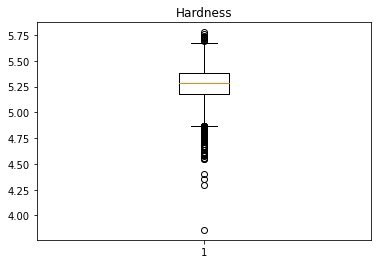

Solids


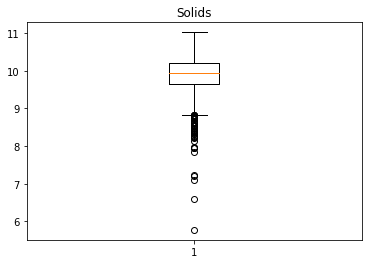

Chloramines


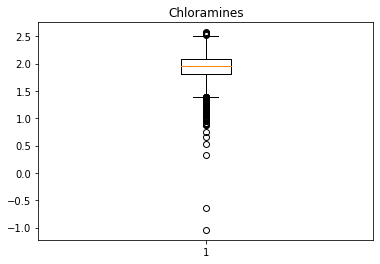

Sulfate


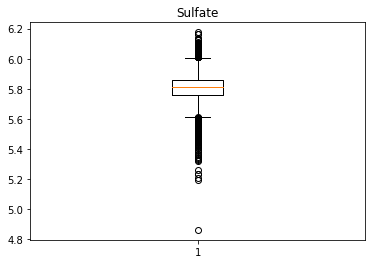

Conductivity


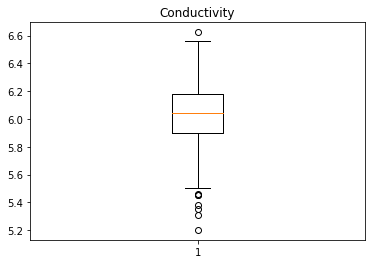

Organic_carbon


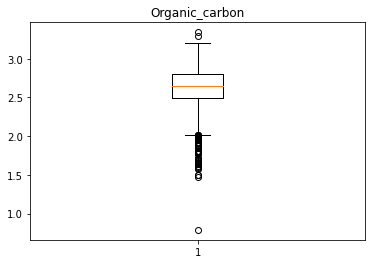

Trihalomethanes


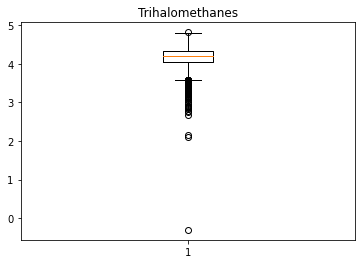

Turbidity


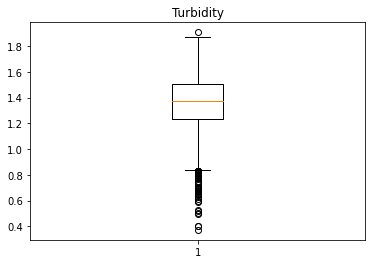

In [179]:
for cols in data_frame.columns:
    data=data_frame.copy()
    #checking whether there is 0 in unique values of features. because, we cannot convert 0 into log value
    if 0 not in data[cols].unique():
        #transforming the values into log values.
        data[cols]=np.log(data[cols])
        print(cols)
        plt.boxplot(data[cols])
        plt.title(cols)
        plt.show()

**There are still outliers in the features.** 
**Let's proceed with the original values after null value replacement**

In [195]:
data_frame.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Scaling the values using MinMaxScaler

In [183]:
from sklearn.preprocessing import MinMaxScaler

In [184]:
scaler=MinMaxScaler()

In [186]:
scaler.fit(data_frame)

MinMaxScaler()

In [189]:
transformed_values=scaler.transform(data_frame)

In [190]:
new_data=pd.DataFrame(transformed_values,columns=data_frame.columns)

In [191]:
new_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.502625,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0
1,0.265434,0.297400,0.300611,0.491839,0.579704,0.719411,0.497319,0.450999,0.576793,0.0
2,0.578509,0.641311,0.321619,0.698543,0.579704,0.414652,0.562017,0.532866,0.303637,0.0
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0


In [197]:
#saving the modified data
new_data.to_csv('modified_data_water_quality_prediction.csv',index=False)